# PPAC Analysis Notebook

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit

## Load Data

In [2]:
data_dir = 'correlations/all_isobutane_1_hit_square'
data_paths = {
    "coincident": Path(f"{data_dir}/coincident_imp.pkl"),
    "decay_candidates": Path(f"{data_dir}/decay_candidates.pkl"),
    "final_correlated": Path(f"{data_dir}/final_correlated.pkl"),
}
data = {}
for name, path in data_paths.items():
    if path.exists():
        data[name] = pd.read_pickle(path)
        print(f"Loaded {name}: {len(data[name])} rows")
    else:
        print(f"File {path} not found")
        
        
decays = data["decay_candidates"]    
coincident = data["coincident"]  

Loaded coincident: 941743 rows
Loaded decay_candidates: 117133 rows
Loaded final_correlated: 99162 rows


## Basic Inspection

In [3]:
for name, df in data.items():
    display(df.head())

,imp_timetag,imp_x,imp_y,imp_tagx,imp_tagy,imp_nfile,imp_tdelta,imp_nX,imp_nY,imp_xE,...,dt_anodeH_ps,dt_cathode_ns,dt_anodeV_ns,dt_anodeH_ns,dt_cathode_us,dt_anodeV_us,dt_anodeH_us,dt_anodeH_us_corr,dt_anodeV_us_corr,dt_cathode_us_corr
0,104169462493,67,42,104169462493,104169364119,0,98374,1,1,1910.972434,...,NaN,-1062.490,-1126.745,NaN,-1.062490,-1.126745,NaN,NaN,-1.126745,-1.062490
1,627749714881,127,56,627749714881,627749562259,0,152622,2,1,33440.785444,...,-1089202.0,-1501.189,-1512.462,-1089.202,-1.501189,-1.512462,-1.089202,-1.089202,-1.512462,-1.501189
2,729203122743,14,34,729203122743,729203105393,0,17350,1,1,30080.408837,...,-1383371.0,-1375.522,-1379.625,-1383.371,-1.375522,-1.379625,-1.383371,-1.383371,-1.379625,-1.375522
3,816151533496,63,57,816151533496,816151422993,0,110503,1,1,762.700693,...,NaN,NaN,-1145.251,NaN,NaN,-1.145251,NaN,NaN,-1.145251,NaN
4,1205216432618,145,13,1205216432618,1205216297772,0,134846,1,1,33520.851934,...,-1090626.0,-1501.663,-1514.437,-1090.626,-1.501663,-1.514437,-1.090626,-1.090626,-1.514437,-1.501663


,t,x,y,tagx,tagy,nfile,xboard,yboard,tdelta,nX,nY,xE,yE,event_type,recoil_index,recoil_time_sec,ppac_flag,is_clean,log_dt
0,26.741857,144,25,26741856611393,26741856506002,0,1,6,105391,1,1,30900.759173,30503.391502,imp,24,6.968799,both,False,2.984320
1,17.108646,122,1,17108646360995,17108646197996,0,1,6,162999,1,2,587.379553,454.287468,imp,31,7.564186,both,False,2.255961
2,15.591782,46,36,15591782097999,15591782113996,0,5,7,-15997,1,1,326.664831,434.410224,imp,39,9.067891,both,False,1.875471
3,22.108337,138,32,22108336560684,22108336458056,0,1,7,102628,1,1,3301.376987,3288.007685,imp,42,9.329768,both,False,2.547769
4,23.629469,18,50,23629469060998,23629469009993,0,5,7,51005,1,2,798.777652,665.290531,imp,50,11.247450,both,False,2.516245


,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,electron1_x,electron1_y,electron1_t,electron1_xE,electron1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
0,95.0,20.0,7140.940765,8.612967e+13,8.612967e+13,0.0,8.612967e+13,16.0,8.612967e+13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97.0,19.0,5747.336024,1.039408e+14,1.039408e+14,0.0,NaN,NaN,1.039408e+14,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35.0,26.0,6331.925782,1.360950e+14,1.360950e+14,0.0,1.360950e+14,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61.0,5.0,6767.744249,2.776266e+14,2.776266e+14,0.0,2.776266e+14,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50.0,4.0,4035.201754,3.149250e+14,3.149250e+14,13.0,3.149250e+14,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## REA
Plot a histogram of recoil energies from the coincident events.

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,electron1_x,electron1_y,electron1_t,electron1_xE,electron1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
225,62.0,30.0,7240.127739,5.092379e+14,5.092379e+14,0.0,5.092379e+14,9.0,NaN,NaN,...,61.0,31.0,511.155327,411.776928,1.917377,NaN,NaN,NaN,NaN,NaN
2717,39.0,24.0,5558.962913,1.622560e+15,1.622560e+15,3.0,1.622560e+15,0.0,NaN,NaN,...,38.0,24.0,1624.266473,440.203821,1.706119,NaN,NaN,NaN,NaN,NaN
2718,59.0,26.0,5985.764547,1.724083e+15,1.724083e+15,3.0,1.724083e+15,0.0,NaN,NaN,...,60.0,25.0,1725.216610,344.366622,1.133427,NaN,NaN,NaN,NaN,NaN
2719,102.0,54.0,5092.879504,1.724604e+15,1.724604e+15,0.0,1.724604e+15,10.0,1.724604e+15,0.0,...,103.0,53.0,1725.868989,399.307755,1.265230,NaN,NaN,NaN,NaN,NaN
2720,106.0,53.0,7103.430665,2.120140e+15,2.120140e+15,138.0,2.120140e+15,10.0,2.120140e+15,8.0,...,107.0,54.0,2120.876524,605.242754,0.736070,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99118,30.0,7.0,7445.455633,2.216526e+15,2.216526e+15,3890.0,2.216526e+15,1317.0,2.216526e+15,1074.0,...,31.0,7.0,2224.763418,529.518792,8.237178,NaN,NaN,NaN,NaN,NaN
99119,73.0,43.0,6769.366776,2.383751e+15,2.383751e+15,2993.0,2.383751e+15,766.0,2.383751e+15,811.0,...,73.0,44.0,2389.196703,299.305685,5.446098,NaN,NaN,NaN,NaN,NaN
99120,101.0,34.0,7194.278940,2.394006e+15,2.394006e+15,2771.0,2.394006e+15,741.0,2.394006e+15,642.0,...,101.0,35.0,2394.332351,420.426427,0.326404,NaN,NaN,NaN,NaN,NaN
99121,72.0,25.0,6949.840531,2.524918e+15,2.524918e+15,3505.0,2.524918e+15,1528.0,2.524918e+15,601.0,...,71.0,26.0,2528.481123,328.932307,3.562807,NaN,NaN,NaN,NaN,NaN


337


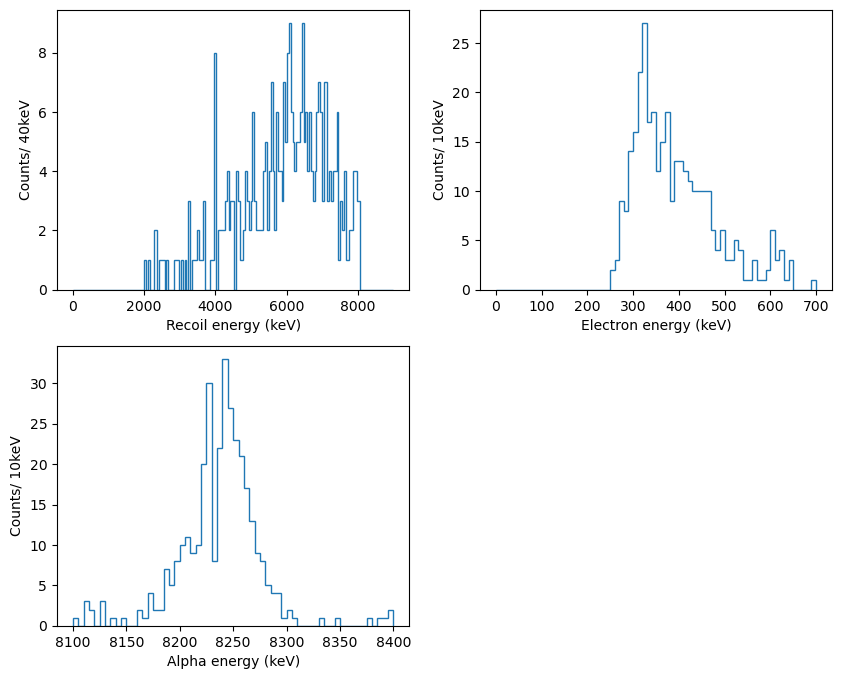

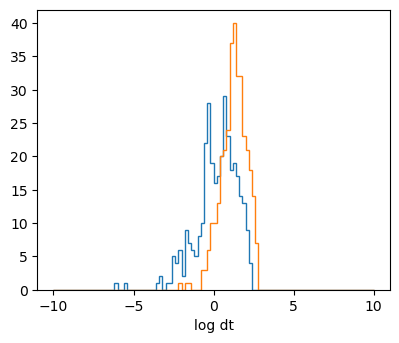

In [4]:
# Inspect
df = data["final_correlated"]
df_REA = df[df["chain"] == "REA"]
display(df_REA)
print(len(df_REA))

# plotting
# Plotting

if len(df_REA) >0:
    
    # Energies
    plt.figure(figsize=(10,8))
    plt.subplot(221)
    plt.hist(df_REA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
    plt.xlabel('Recoil energy (keV)')
    plt.ylabel(r'Counts/ 40keV')
    plt.subplot(222)
    plt.hist(df_REA['electron1_xE'], histtype='step',bins=70, range=(0,700))
    plt.xlabel('Electron energy (keV)')
    plt.ylabel(r'Counts/ 10keV')
    plt.subplot(223)
    plt.hist(df_REA['alpha1_xE'], histtype='step', bins=60, range=(8100,8400))
    plt.xlabel('Alpha energy (keV)')
    plt.ylabel(r'Counts/ 10keV')
    plt.show()
    plt.close()
    
    # KHS plots 
    plt.figure(figsize=(10,8))
    plt.subplot(221)
    plt.hist(np.log(np.abs(df_REA['electron1_t']-df_REA[r'recoil_t'])), histtype='step', bins =100, range=(-10,10))
    plt.xlabel('log dt')
    plt.subplot(221)
    plt.hist(np.log(np.abs(df_REA['alpha1_t']-df_REA[r'recoil_t'])), histtype='step', bins =100, range=(-10,10))

# RE

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,electron1_x,electron1_y,electron1_t,electron1_xE,electron1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
11,3.0,27.0,3052.923976,5.976126e+12,5.976125e+12,0.0,5.976125e+12,13.0,NaN,NaN,...,4.0,26.0,11.806794,273.931756,5.830667,NaN,NaN,NaN,NaN,NaN
12,162.0,54.0,3245.943663,6.243211e+12,6.243210e+12,2.0,6.243210e+12,0.0,NaN,NaN,...,162.0,55.0,12.983230,386.148647,6.740019,NaN,NaN,NaN,NaN,NaN
13,23.0,37.0,4914.035165,7.520175e+12,7.520174e+12,140.0,7.520174e+12,24.0,7.520174e+12,0.0,...,24.0,36.0,10.207788,336.805106,2.687612,NaN,NaN,NaN,NaN,NaN
14,122.0,1.0,5105.419375,7.564186e+12,7.564185e+12,0.0,7.564185e+12,3.0,NaN,NaN,...,122.0,1.0,17.108646,587.379553,9.544461,NaN,NaN,NaN,NaN,NaN
15,18.0,29.0,4202.538338,7.619643e+12,7.619642e+12,9.0,7.619642e+12,31.0,NaN,NaN,...,19.0,28.0,14.452257,608.707389,6.832614,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99103,94.0,4.0,7147.714356,4.076455e+15,4.076455e+15,3199.0,4.076455e+15,726.0,4.076455e+15,1017.0,...,94.0,4.0,4080.680294,401.632467,4.225786,NaN,NaN,NaN,NaN,NaN
99104,1.0,34.0,5553.102049,4.076550e+15,4.076550e+15,3397.0,4.076550e+15,577.0,4.076550e+15,1501.0,...,0.0,34.0,4077.377763,614.824882,0.827758,NaN,NaN,NaN,NaN,NaN
99105,42.0,20.0,4924.341453,4.076754e+15,4.076754e+15,3111.0,4.076754e+15,795.0,4.076754e+15,908.0,...,43.0,21.0,4077.686143,551.638680,0.932430,NaN,NaN,NaN,NaN,NaN
99106,58.0,40.0,4270.168536,4.080736e+15,4.080736e+15,2554.0,4.080736e+15,898.0,4.080736e+15,468.0,...,58.0,40.0,4081.741693,538.735602,1.005233,NaN,NaN,NaN,NaN,NaN


93382


Text(0, 0.5, 'Counts/ 10keV')

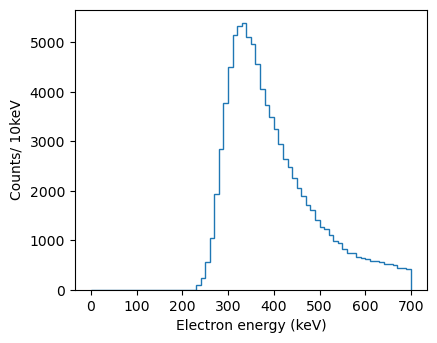

In [5]:
df = data["final_correlated"]
df_RE = df[df["chain"] == "RE"]
display(df_RE)
print(len(df_RE))
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_RE['electron1_xE'], histtype='step',bins=70, range=(0,700))
plt.xlabel('Electron energy (keV)')
plt.ylabel(r'Counts/ 10keV')

# RA

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,electron1_x,electron1_y,electron1_t,electron1_xE,electron1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
0,95.0,20.0,7140.940765,8.612967e+13,8.612967e+13,0.0,8.612967e+13,16.0,8.612967e+13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97.0,19.0,5747.336024,1.039408e+14,1.039408e+14,0.0,NaN,NaN,1.039408e+14,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35.0,26.0,6331.925782,1.360950e+14,1.360950e+14,0.0,1.360950e+14,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61.0,5.0,6767.744249,2.776266e+14,2.776266e+14,0.0,2.776266e+14,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50.0,4.0,4035.201754,3.149250e+14,3.149250e+14,13.0,3.149250e+14,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96021,42.0,43.0,6123.369236,3.898232e+15,3.898232e+15,4378.0,3.898232e+15,1031.0,3.898232e+15,1531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96022,53.0,32.0,5849.770673,3.987799e+15,3.987799e+15,3589.0,3.987799e+15,978.0,3.987799e+15,1089.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96023,91.0,36.0,4410.116379,4.006107e+15,4.006107e+15,3930.0,4.006107e+15,1002.0,4.006107e+15,1381.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96024,53.0,24.0,6371.656013,4.015510e+15,4.015510e+15,3561.0,4.015510e+15,1319.0,4.015510e+15,727.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Counts/ 40keV')

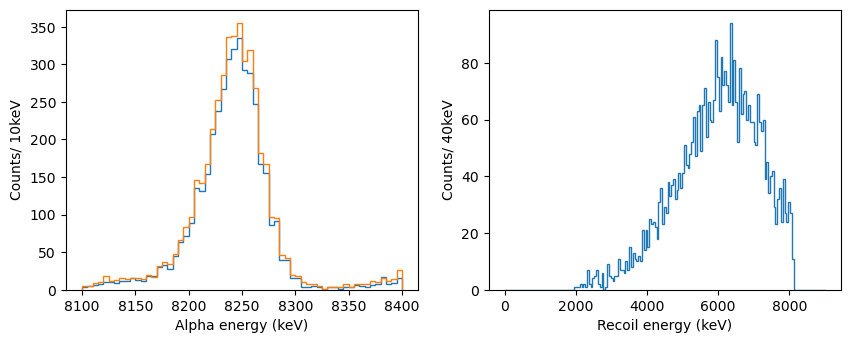

In [6]:
df = data["final_correlated"]
df_RA = df[df["chain"] == "RA"]
display(df_RA)
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_RA['alpha1_xE'], histtype='step', bins=60, range=(8100,8400))
plt.hist(decays['xE'], histtype='step', bins=60, range=(8100,8400))
plt.xlabel('Alpha energy (keV)')
plt.ylabel(r'Counts/ 10keV')

plt.subplot(222)
plt.hist(df_RA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
plt.xlabel('Recoil energy (keV)')
plt.ylabel(r'Counts/ 40keV')

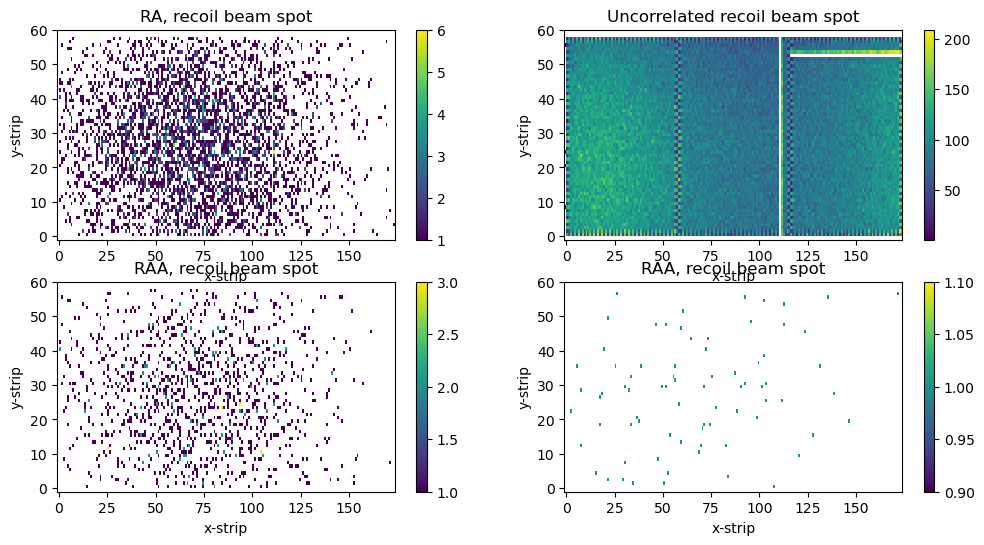

In [36]:
# # correlated beam spot
plt.figure(figsize=(12,6))
# plt.subplots_adjust(hpsace=0.3)
plt.subplot(221)
plt.hist2d(df_RA['recoil_x'], df_RA['recoil_y'], 
           bins=((175),(61)), range=((-1,174),(-1,60)), cmin=1)
plt.xlabel('x-strip')
plt.ylabel(r'y-strip')
plt.title(r'RA, recoil beam spot')
plt.colorbar()


plt.subplot(222)
plt.hist2d(coincident['imp_x'], coincident['imp_y'], 
           bins=((175),(61)), range=((-1,174),(-1,60)), cmin=1)
# plt.xlim(0, 10000)
plt.xlabel('x-strip')
plt.ylabel(r'y-strip')
plt.title(r'Uncorrelated recoil beam spot')
plt.colorbar()

plt.subplot(223)
plt.hist2d(df_RAA['recoil_x'], df_RAA['recoil_y'], 
           bins=((175),(61)), range=((-1,174),(-1,60)), cmin=1)
plt.xlabel('x-strip')
plt.ylabel(r'y-strip')
plt.title(r'RAA, recoil beam spot')
plt.colorbar()

plt.subplot(224)
plt.hist2d(df_REAA['recoil_x'], df_REAA['recoil_y'], 
           bins=((175),(61)), range=((-1,174),(-1,60)), cmin=1)
plt.xlabel('x-strip')
plt.ylabel(r'y-strip')
plt.title(r'RAA, recoil beam spot')
plt.colorbar()





# RAA

In [8]:
df_RAA = df[df['chain']=='RAA']
display(df_RAA)

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,electron1_x,electron1_y,electron1_t,electron1_xE,electron1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
226,95.0,20.0,7140.940765,8.612967e+13,8.612967e+13,0.0,8.612967e+13,16.0,8.612967e+13,0.0,...,NaN,NaN,NaN,NaN,NaN,95.0,20.0,124.273195,7396.641724,35.578376
227,97.0,19.0,5747.336024,1.039408e+14,1.039408e+14,0.0,NaN,NaN,1.039408e+14,0.0,...,NaN,NaN,NaN,NaN,NaN,97.0,19.0,267.178228,7374.271444,160.837018
228,81.0,13.0,4538.430259,3.329776e+14,3.329776e+14,118.0,3.329776e+14,0.0,3.329776e+14,9.0,...,NaN,NaN,NaN,NaN,NaN,81.0,13.0,769.206541,7438.565084,431.229301
229,65.0,46.0,6576.566208,4.247074e+14,4.247074e+14,110.0,4.247074e+14,0.0,4.247074e+14,8.0,...,NaN,NaN,NaN,NaN,NaN,65.0,46.0,631.790692,7464.640067,205.768927
2725,89.0,21.0,3842.515834,1.719625e+14,1.719625e+14,92.0,1.719625e+14,8.0,1.719625e+14,0.0,...,NaN,NaN,NaN,NaN,NaN,89.0,21.0,624.708761,7386.393557,448.956147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99152,40.0,20.0,7304.315487,3.561769e+15,3.561769e+15,3224.0,3.561769e+15,714.0,3.561769e+15,1204.0,...,NaN,NaN,NaN,NaN,NaN,40.0,20.0,3603.005651,7396.382260,40.722858
99153,79.0,31.0,5446.813292,3.597923e+15,3.597923e+15,3260.0,3.597923e+15,1051.0,3.597923e+15,805.0,...,NaN,NaN,NaN,NaN,NaN,79.0,31.0,3828.440799,7384.624923,229.987371
99154,111.0,27.0,6626.302938,3.683817e+15,3.683817e+15,3022.0,3.683817e+15,1245.0,3.683817e+15,379.0,...,NaN,NaN,NaN,NaN,NaN,111.0,27.0,3798.363355,7419.924242,104.877065
99155,79.0,8.0,6063.029465,3.693025e+15,3.693025e+15,3966.0,3.693025e+15,1304.0,3.693025e+15,1028.0,...,NaN,NaN,NaN,NaN,NaN,79.0,8.0,3954.141214,7412.364557,256.423264


(0.0, 700.0)

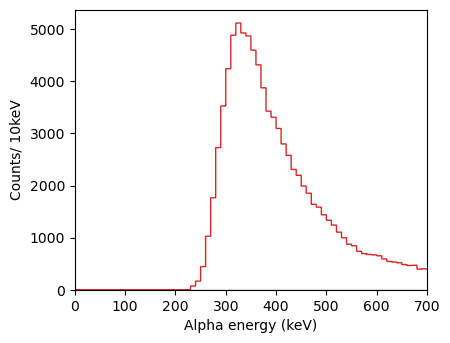

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_RAA['alpha1_xE'], histtype='step', bins=60, range=(8100,8400))
plt.hist(df_RAA['alpha2_xE'], histtype='step', bins=60, range=(7250,7550))
plt.hist(df_RAA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
plt.hist(decays['xE'], histtype='step', bins=1000, range=(0,10e3))
plt.xlabel('Alpha energy (keV)')
plt.ylabel(r'Counts/ 10keV')
# plt.xlim(7e3,9e3)
plt.xlim(0,700)
# plt.ylim(top=600)

# REAA

In [10]:
df_REAA = df[df['chain']=='REAA']
display(df_REAA)

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,electron1_x,electron1_y,electron1_t,electron1_xE,electron1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
2782,102.0,54.0,5092.879504,1.724604e+15,1.724604e+15,0.0,1.724604e+15,10.0,1.724604e+15,0.0,...,103.0,53.0,1725.868989,399.307755,1.265230,102.0,54.0,1990.233748,7418.533628,261.666073
2783,49.0,29.0,6232.930004,2.522816e+15,2.522816e+15,99.0,2.522816e+15,5.0,2.522816e+15,0.0,...,49.0,28.0,2523.570463,643.607378,0.754419,50.0,28.0,3044.713528,7388.677685,516.926360
2784,60.0,51.0,6231.201971,5.310682e+15,5.310682e+15,84.0,5.310682e+15,10.0,5.310682e+15,0.0,...,59.0,51.0,5311.560576,339.883366,0.878824,60.0,51.0,5344.959493,7412.901941,31.203113
6405,83.0,3.0,2909.041334,3.806273e+14,3.806273e+14,889.0,3.806273e+14,149.0,3.806273e+14,157.0,...,84.0,3.0,381.050572,644.024453,0.423254,83.0,3.0,1169.432432,7425.339983,788.339605
6406,87.0,33.0,6644.973392,4.200585e+15,4.200585e+15,810.0,4.200585e+15,205.0,4.200585e+15,78.0,...,87.0,34.0,4203.444802,353.904282,2.859494,87.0,33.0,4725.206355,7440.053216,519.832920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99157,51.0,47.0,6022.040698,7.057384e+14,7.057384e+14,4086.0,7.057384e+14,1625.0,7.057384e+14,733.0,...,52.0,46.0,709.227135,282.465128,3.488703,52.0,48.0,1445.290301,7408.720240,734.777779
99158,59.0,46.0,6298.644641,1.074017e+15,1.074017e+15,2046.0,1.074017e+15,555.0,1.074017e+15,420.0,...,60.0,46.0,1074.298191,397.543120,0.280775,59.0,46.0,1142.855079,7383.696761,67.343662
99159,72.0,40.0,6474.682520,1.812077e+15,1.812077e+15,3961.0,1.812077e+15,1167.0,1.812077e+15,1205.0,...,72.0,39.0,1816.138562,448.724640,4.061539,72.0,39.0,1862.114564,7415.057999,42.504444
99160,30.0,7.0,7445.455633,2.216526e+15,2.216526e+15,3890.0,2.216526e+15,1317.0,2.216526e+15,1074.0,...,31.0,7.0,2224.763418,529.518792,8.237178,30.0,7.0,2246.393430,7383.734692,21.481552


Text(0, 0.5, 'Counts/ 10keV')

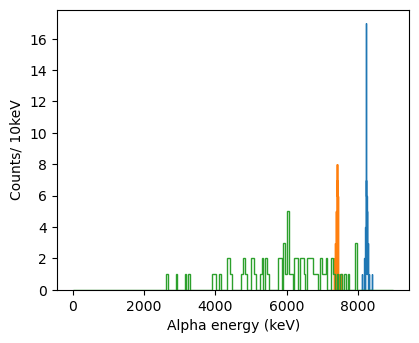

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_REAA['alpha1_xE'], histtype='step', bins=60, range=(8100,8400))
plt.hist(df_REAA['alpha2_xE'], histtype='step', bins=60, range=(7250,7550))
plt.hist(df_REAA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
plt.xlabel('Alpha energy (keV)')
plt.ylabel(r'Counts/ 10keV')

# Decay KHS

Text(0, 0.5, 'Ln($\\Delta$t/ s)/ 10 keV')

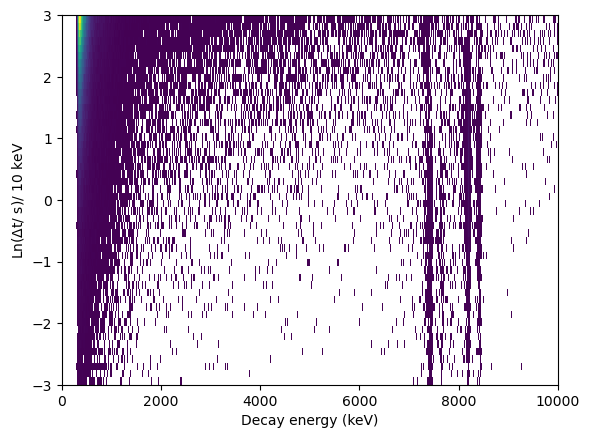

In [12]:
plt.figure()
plt.hist2d(decays['yE'], decays['log_dt'], 
           bins=((500),(50)), range=((0,10000),(-3,3)), cmin=1)
plt.xlabel('Decay energy (keV)')
plt.ylabel(r'Ln($\Delta$t/ s)/ 10 keV')




# electron half-life

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Conversion factors for displaying half-life in different units
_UNIT_CONVERSION = {
    's': 1,       # seconds
    'ms': 1e3,    # milliseconds
    'us': 1e6,    # microseconds
    'min': 1/60,  # minutes
    'h': 1/3600   # hours
}


def fit_log_dt_decay(df, t1_col, t2_col, initial_guess,
                     bins=50, hist_range=(-10, 3), num_theta=500,
                     bounds=([0, 0], [np.inf, np.inf]), ax=None,
                     color=None, display_unit='s',
                     plot_data_kwargs=None, plot_fit_kwargs=None):
    """
    Histogram + exponential fit in log(dt) space, with optional plotting.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataset.
    t1_col, t2_col : str
        Column names for computing dt = df[t1_col] - df[t2_col].
    initial_guess : sequence of two floats [lambda_guess, n0_guess]
        Initial parameter guesses for curve fitting.
    bins : int
        Number of histogram bins.
    hist_range : tuple
        (min, max) range for log(dt) histogram.
    num_theta : int
        Number of points for the smooth fit curve.
    bounds : 2×2 array-like
        Parameter bounds for scipy.optimize.curve_fit.
    ax : matplotlib.axes.Axes or None
        Axes on which to plot; if None, no plotting is done.
    color : str or None
        Color string for plotting data and fit.
    display_unit : str, optional
        Unit for displaying half-life in the legend. Must be one of:
        's', 'ms', 'us', 'min', 'h'. Default is 's'.
    plot_data_kwargs : dict or None
        Additional kwargs for ax.errorbar.
    plot_fit_kwargs : dict or None
        Additional kwargs for ax.plot of the fit curve.

    Returns
    -------
    result : dict
        Contains histogram, fit parameters, half-life in seconds, and fit curve.
    """
    # Validate display_unit
    if display_unit not in _UNIT_CONVERSION:
        raise ValueError(f"Unsupported display_unit '{display_unit}'. "
                         f"Choose from {list(_UNIT_CONVERSION.keys())}.")

    # 1. Compute log(dt) and histogram
    log_dt = np.log(df[t1_col] - df[t2_col])
    hist, edges = np.histogram(log_dt, bins=bins, range=hist_range)
    centers = 0.5 * (edges[:-1] + edges[1:])

    # 2. Mask zero-count bins
    mask = hist > 0
    x = centers[mask]
    y = hist[mask]

    # 3. Define model PDF in theta = ln(dt)
    def _pdf(theta, lam, n0):
        dt = np.exp(theta)
        return n0 * lam * dt * np.exp(-lam * dt)

    # 4. Curve fitting
    popt, pcov = curve_fit(_pdf, x, y, p0=initial_guess, bounds=bounds)
    lam_fit, n0_fit = popt
    lam_err = np.sqrt(np.diag(pcov))[0]

    # 5. Compute half-life and error in seconds
    t_half_sec = np.log(2) / lam_fit
    t_half_err_sec = (np.log(2) / lam_fit**2) * lam_err

    # 6. Convert to desired display unit
    factor = _UNIT_CONVERSION[display_unit]
    t_half_disp = t_half_sec * factor
    t_half_err_disp = t_half_err_sec * factor

    # 7. Build smooth fitted curve
    theta_fit = np.linspace(edges.min(), edges.max(), num_theta)
    fit_curve = _pdf(theta_fit, lam_fit, n0_fit)

    result = {
        'bin_centres': centers,
        'hist': hist,
        'fit_mask': mask,
        'fit_bin_centres': x,
        'popt': popt,
        'pcov': pcov,
        't_half_sec': t_half_sec,
        't_half_err_sec': t_half_err_sec,
        't_half_disp': t_half_disp,
        't_half_err_disp': t_half_err_disp,
        'disp_unit': display_unit,
        'theta_fit': theta_fit,
        'fit_curve': fit_curve,
    }

    # 8. Optional plotting
    if ax is not None:
        # Default plotting kwargs
        pdkw = {'fmt': 'o', 'yerr': np.sqrt(hist + 1), 'capsize': 2, 'ms': 4}
        pfkw = {'lw': 2}
        if color is not None:
            pdkw['color'] = color
            pfkw['color'] = color
        if plot_data_kwargs:
            pdkw.update(plot_data_kwargs)
        if plot_fit_kwargs:
            pfkw.update(plot_fit_kwargs)

        # Plot histogram and fit
        ax.errorbar(centers, hist, alpha=0.3, **pdkw)
        ax.step(centers, hist, where='mid', alpha=0.6,
                color=color if color is not None else pdkw.get('color'))
        unit_label = display_unit
        ax.plot(theta_fit, fit_curve, **pfkw,
                label=f"T₁/₂ = {t_half_disp:.2f} ± {t_half_err_disp:.2f} {unit_label}")

    return result


def plot_multiple_decay_fits(datasets, figsize=(6,4),
                             bins=50, hist_range=(-10, 3),
                             num_theta=500, bounds=([0, 0], [np.inf, np.inf]),
                             display_unit='s'):
    """
    Plot several decay-fits on one axes, each with a consistent color and unit.

    Parameters
    ----------
    datasets : list of dicts
        Each dict should contain:
        - 'df': pandas.DataFrame
        - 't1_col', 't2_col': column names
        - 'initial': [lambda_guess, n0_guess]
        - 'label': str for legend entry
        - 'linestyle': optional linestyle for fit curve
    figsize : tuple
        Figure size in inches.
    bins, hist_range, num_theta, bounds : passed to fit function.
    display_unit : str
        Unit for T₁/₂ display (same options as fit_log_dt_decay).

    Returns
    -------
    fig, ax : matplotlib Figure and Axes with overlaid fits.
    """
    # Validate display_unit
    if display_unit not in _UNIT_CONVERSION:
        raise ValueError(f"Unsupported display_unit '{display_unit}'. "
                         f"Choose from {list(_UNIT_CONVERSION.keys())}.")

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel('log(dt / s)')
    ax.set_ylabel('Counts')

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for idx, data in enumerate(datasets):
        color = colors[idx % len(colors)]
        res = fit_log_dt_decay(
            df=data['df'],
            t1_col=data['t1_col'],
            t2_col=data['t2_col'],
            initial_guess=data['initial'],
            bins=bins,
            hist_range=hist_range,
            num_theta=num_theta,
            bounds=bounds,
            ax=ax,
            color=color,
            display_unit=display_unit,
            plot_data_kwargs={'label': data.get('label')},
            plot_fit_kwargs={'linestyle': data.get('linestyle', '-')}
        )

    ax.legend(title=f"T₁/₂ [{display_unit}]")
    ax.grid(alpha=0.3)
    plt.tight_layout()
    return fig, ax


# Electron half life

In [14]:
display(df_REA['alpha1_t'])

225       512.003527
2717     1625.043071
2718     1730.465250
2719     1728.567675
2720     2129.763016
            ...     
99118    2224.911878
99119    2389.467248
99120    2395.783682
99121    2529.122838
99122    2985.706274
Name: alpha1_t, Length: 337, dtype: float64

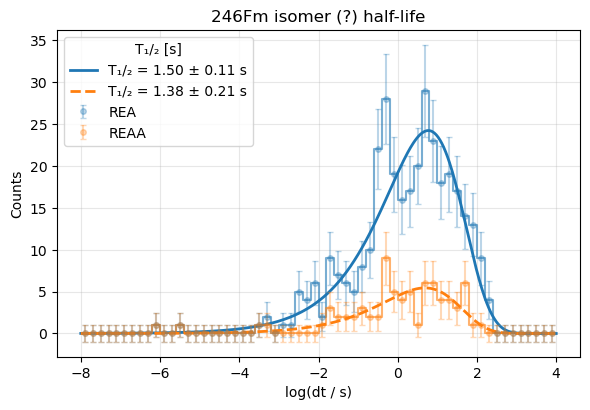

In [15]:
# # Define your list of data‐settings:
fm246_isomer = [
    {
      'df': df_REA,
      't1_col': 'electron1_t',
      't2_col': 'recoil_t',
      'initial': [np.log(2)/1.0, 100],  
      'label': 'REA',
      'linestyle': '-'                   
    },
    {
      'df': df_REAA,
      't1_col': 'electron1_t',
      't2_col': 'recoil_t',
      'initial': [np.log(2)/1, 20],
      'label': 'REAA',
      'linestyle': '--'
    },

]

fig, ax = plot_multiple_decay_fits(fm246_isomer,
                                   bins=60,
                                   hist_range=(-8,4))
plt.title("246Fm isomer (?) half-life")
plt.show()


# 246 Fm half life

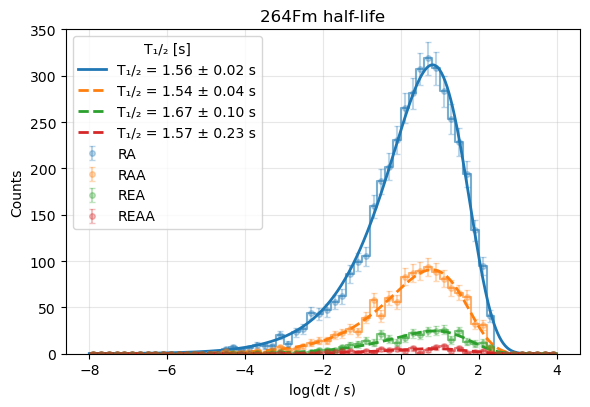

In [17]:
# # Define your list of data‐settings:
fm246 = [
    {
      'df': df_RA,
      't1_col': 'alpha1_t',
      't2_col': 'recoil_t',
      'initial': [np.log(2)/1.5, 100],   # lambda guess, n0 guess
      'label': 'RA',
      'linestyle': '-'                   
    },
    {
      'df': df_RAA,
      't1_col': 'alpha1_t',
      't2_col': 'recoil_t',
      'initial': [np.log(2)/1.5, 20],
      'label': 'RAA',
      'linestyle': '--'
    },
    {
      'df': df_REA,
      't1_col': 'alpha1_t',
      't2_col': 'electron1_t',
      'initial': [np.log(2)/1.5, 20],
      'label': 'REA',
      'linestyle': '--'
    },
    {
      'df': df_REAA,
      't1_col': 'alpha1_t',
      't2_col': 'electron1_t',
      'initial': [np.log(2)/1.5, 20],
      'label': 'REAA',
      'linestyle': '--'
    },

]

fig, ax = plot_multiple_decay_fits(fm246,bins=60,hist_range=(-8,4))
plt.ylim(0,350)
plt.title("264Fm half-life")
plt.show()


# 242 Cf half life

In [ ]:
# # Define your list of data‐settings:
cf242 = [
    {
      'df': df_RAA,
      't1_col': 'alpha2_t',
      't2_col': 'alpha1_t',
      'initial': [np.log(2)/(3.5*60), 20],
      'label': 'RAA',
      'linestyle': '--'
    },
        {
      'df': df_REAA,
      't1_col': 'alpha2_t',
      't2_col': 'alpha1_t',
      'initial': [np.log(2)/(3.5*60), 20],
      'label': 'REAA',
      'linestyle': '--'
    },

]

fig, ax = plot_multiple_decay_fits(cf242,bins=60,hist_range=(0,10),display_unit='min')
# plt.ylim(0,350)
plt.title("242Cf half-life")
plt.show()


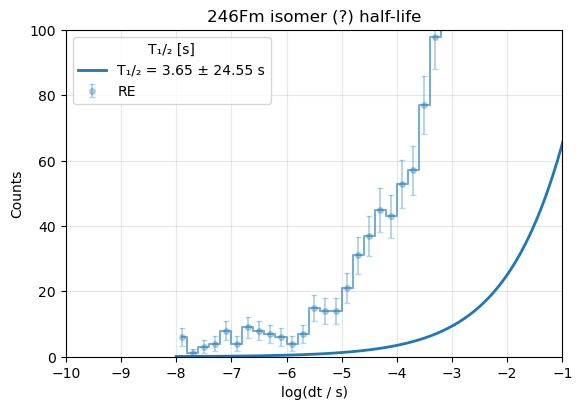

In [27]:
# # Define your list of data‐settings:
test = [
    {
      'df': df_RE,
      't1_col': 'electron1_t',
      't2_col': 'recoil_t',
      'initial': [np.log(2)/5, 1000],  
      'label': 'RE',
      'linestyle': '-'                   
    },

]

fig, ax = plot_multiple_decay_fits(test,
                                   bins=60,
                                   hist_range=(-8,4))
plt.title("246Fm isomer (?) half-life")
plt.xlim(-10,-1)
plt.ylim(0,100)
plt.show()
